In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset_inn.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset

In [4]:
df_local = pd.read_csv(
    "../../../../data/processed/partner_i-Oficial/cement-shipping.csv"
)

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

## Removing the plant to be fine-tuned

In [5]:
df.shape

(3231, 61)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["Factory_Plant"] != "partner_i"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(2001, 61)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [8]:
df = df[df_local.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [9]:
df.shape

(2001, 41)

<IPython.core.display.Javascript object>

## Removing missing features

In [10]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
Portlandite,100.000000
#200,100.000000
Arcanite,100.000000
Gamma C2S,100.000000
Beta C2S,100.000000
Alpha C2S,100.000000
Insoluble Residue,100.000000
Bassanite,100.000000
Anhydrite,100.000000
Calcite,100.000000


<IPython.core.display.Javascript object>

<Axes: >

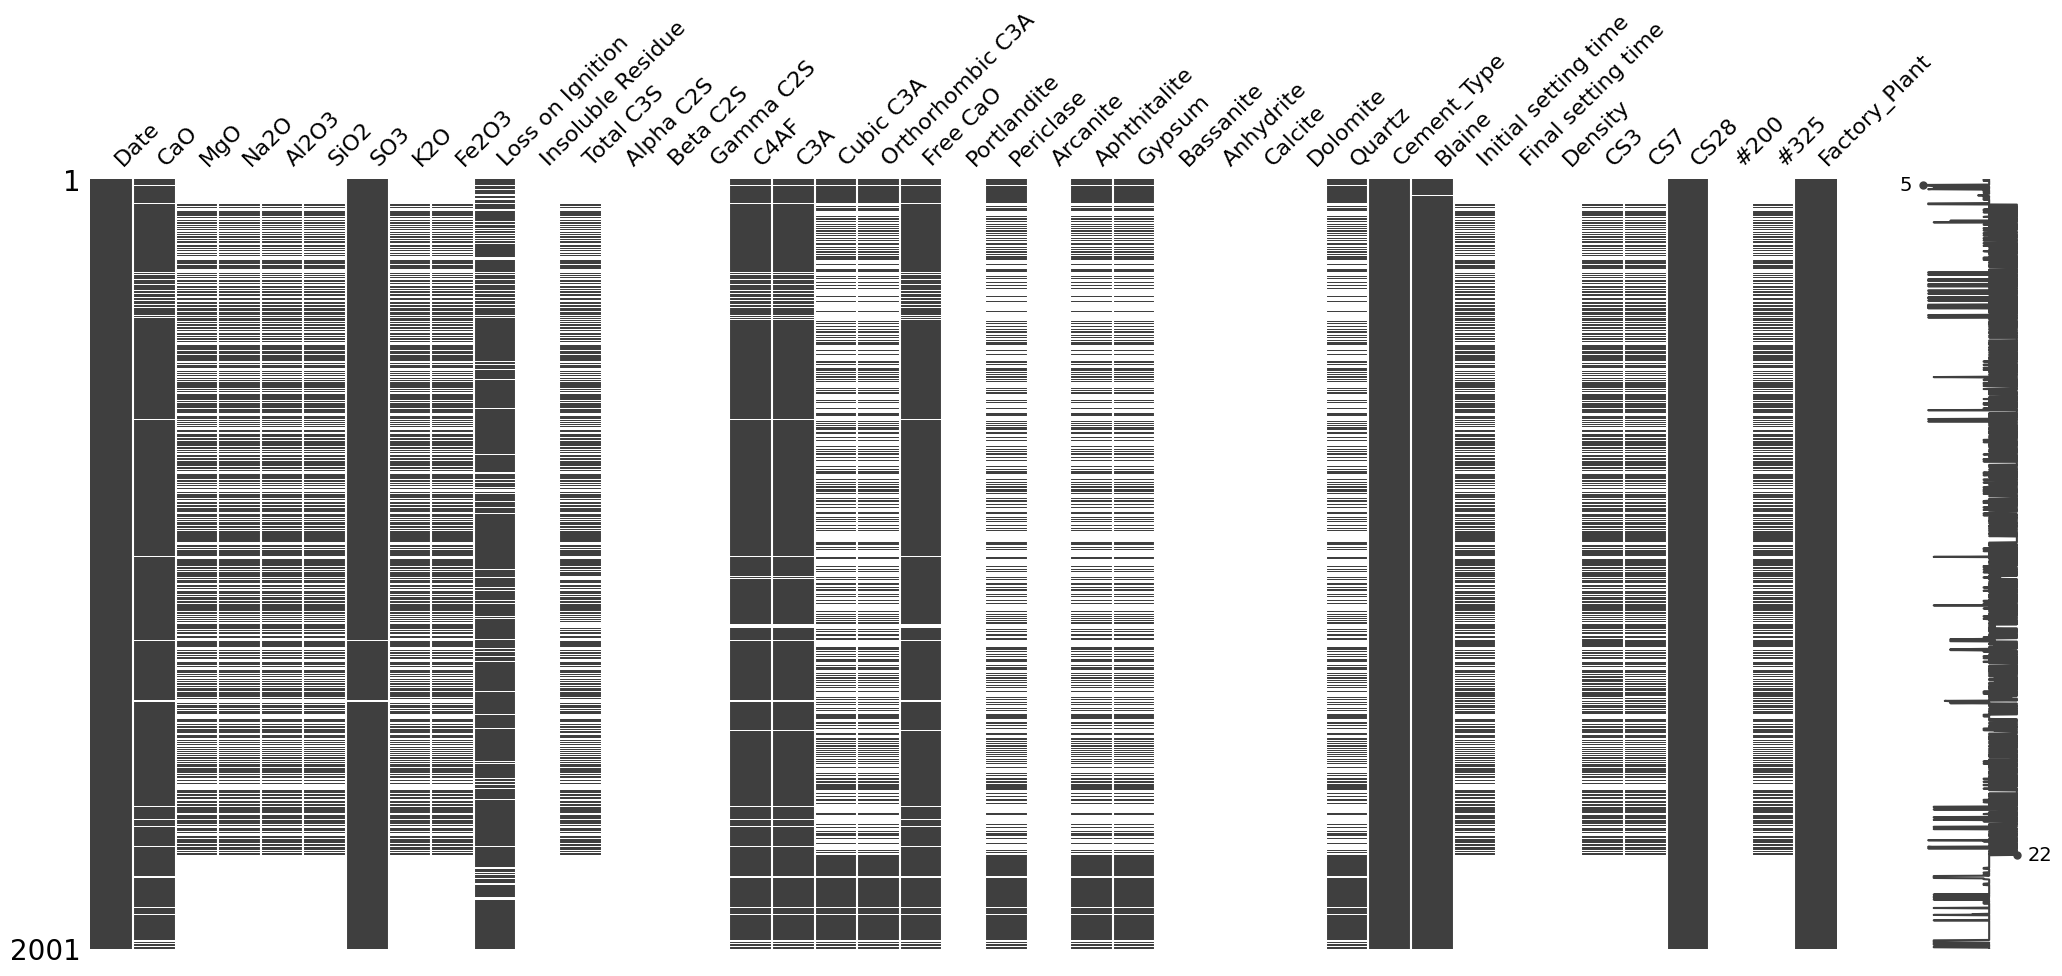

<IPython.core.display.Javascript object>

In [11]:
msno.matrix(df)

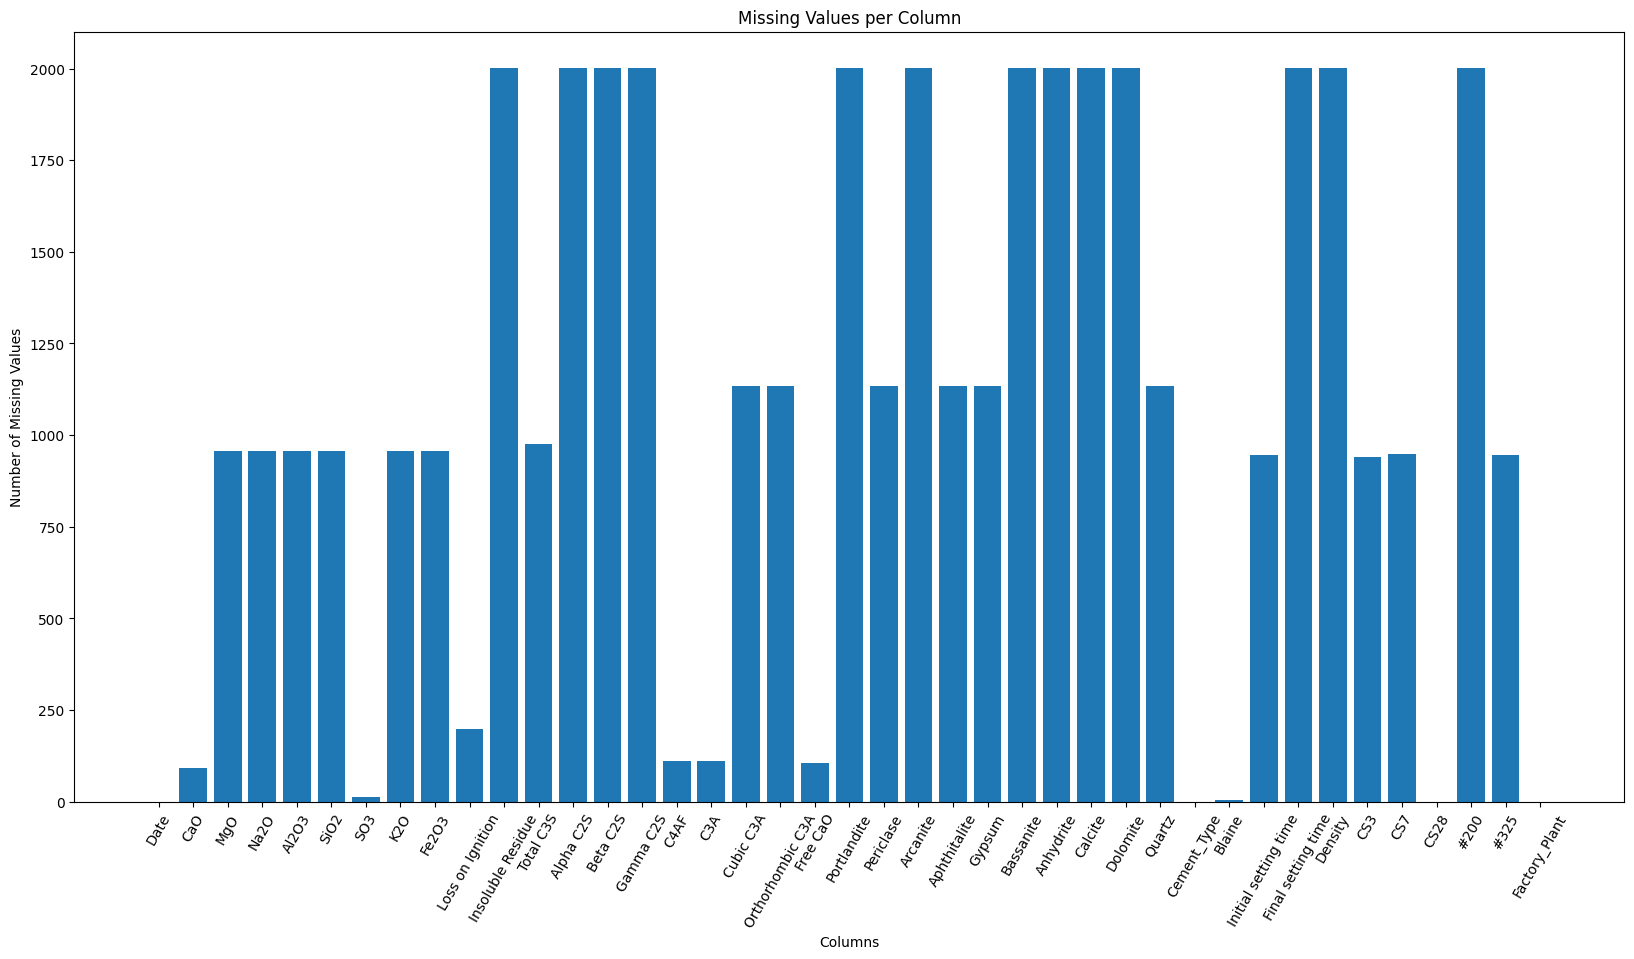

<IPython.core.display.Javascript object>

In [12]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(20, 10))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()